#k-Means

What is it?
k-Means is an unsupervised clustering algorithm. This is different from kNN which is a supervised classification algorithm.

When to use it?
This would be appropriate to use if you have data where you want to find distinct groups, but you do not have a preconcieved notion of the grouping. For example, if you have data about a group of students who you want to put into similar interest and ability groups. This is different from kNN which is a supervised learning algorithm in which you do know the groups that you want to put individuals in.

Limitations?
1. The number of clusters must be specified in the beginning. 
2. k-means can only be used on quantitative data.
3. Can only produces spherical clusters
4. Produces clusters of approximately the same size.

For definition of statistics terms visit: http://www.nedarc.org/statisticalHelp/statisticalTermsDictionary.html
For definitions of machine learning terms visit: https://developers.google.com/machine-learning/glossary/

In [57]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [74]:
# Importing the dataset

data = pd.read_csv('DataSets/Absenteeism_at_work.csv', sep = ';')
data.dtypes
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [76]:
# Eliminating null values
for i in data.columns:
    data[i] = data[i].fillna(int(data[i].mean()))
for i in data.columns:
    print(data[i].isnull().sum())

dataset

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
5,23.0,8,350.0,125,3900.0,17,1980
6,13.0,8,351.0,158,4363.0,13,1974
7,14.0,8,440.0,215,4312.0,9,1971
8,25.4,5,183.0,77,3530.0,20,1980
9,37.7,4,89.0,62,2050.0,17,1982


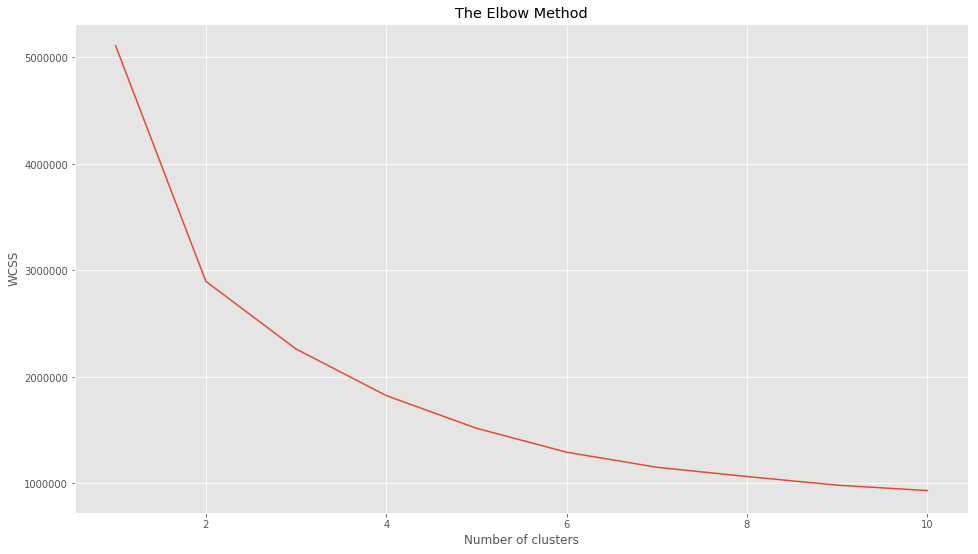

In [78]:
# Using the elbow method to find  the optimal number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



[0 2 2 0 0 2 3 0 2 0 0 0 0 2 2 0 2 2 2 0 3 2 3 0 0 3 0 2 0 2 2 0 0 0 2 3 0
 0 0 0 2 2 2 0 2 2 2 0 0 0 0 0 0 2 0 2 0 2 3 0 2 0 2 2 2 2 2 0 2 0 0 0 2 0
 0 0 0 0 3 0 1 1 1 1 0 2 1 0 1 2 1 1 1 0 0 1 0 0 0 2 2 0 0 0 2 3 0 0 0 3 2
 0 0 1 2 2 2 1 1 1 1 2 1 2 2 2 2 2 2 1 0 2 1 2 2 1 0 1 0 1 2 1 0 0 3 3 1 1
 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 2 0 1 0 1 1 0 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 1 3 1 3
 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 2 2 2 3 2 2 3 3 2 3 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 2 0 0 2 0 3 2 2 2 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 2 0 0 0 0 2 0 2
 2 3 2 2 0 0 0 0 0 0 2 0 2 2 3 0 0 2 2 2 2 2 0 2 0 0 3 2 0 3 0 2 0 2 0 0 0
 2 0 0 3 0 2 0 2 2 0 2 0 0 2 2 2 2 0 2 0 0 0 2 2 0 1 2 1 1 1 0 0 1 2 1 1 2
 2 0 0 0 2 2 2 2 0 2 2 2 0 0 2 2 2 0 2 2 2 0 0 0 2 0 2 3 2 3 3 0 2 2 2 0 0
 2 2 0 0 0 2 0 3 3 0 3 2 2 2 0 0 2 2 0 0 3 2 2 3 0 2 2 0 0 3 2 2 0 2 2 2 2
 0 0 2 0 2 0 2 0 2 0 2 2 2 0 3 0 2 0 0 0 3 2 0 2 0 0 0 0 2 2 3 0 0 0 0 0 2
 2 0 2 0 0 0 2 2 3 0 0 2 

C:\Users\rkalh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


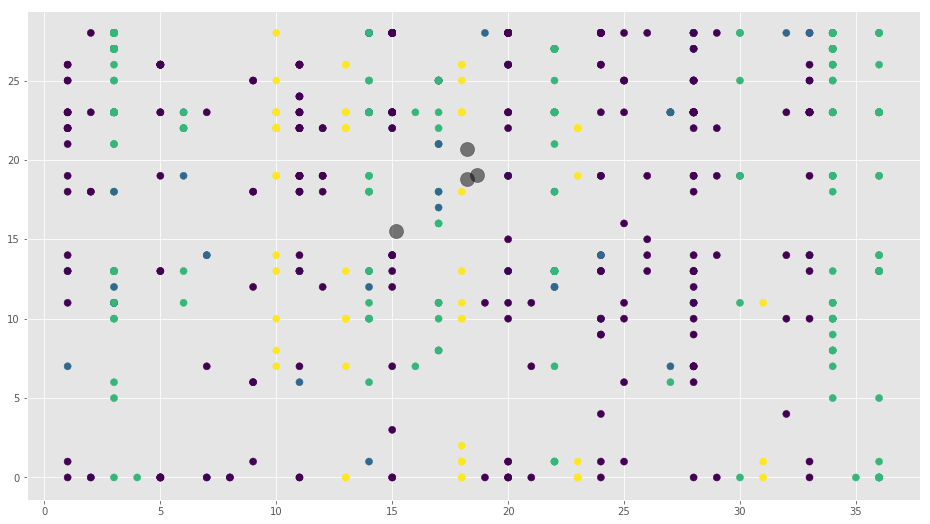

In [83]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)
dataX = data.as_matrix(columns=None)
print(dataX)
# Visualising the clusters
plt.scatter(dataX[:, 0], dataX[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#Car Data Set Example

In [50]:
# Importing the dataset
dataset = pd.read_csv('DataSets/cars.csv', usecols=[0,1,2,3,4,5,6])#, header=None, skiprows=1)
dataset = dataset.convert_objects(convert_numeric=True)
dataset


C:\Users\rkalh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
5,23.0,8,350.0,125,3900.0,17,1980
6,13.0,8,351.0,158,4363.0,13,1974
7,14.0,8,440.0,215,4312.0,9,1971
8,25.4,5,183.0,77,3530.0,20,1980
9,37.7,4,89.0,62,2050.0,17,1982


In [54]:
# Eliminating null values
for i in dataset.columns:
    dataset[i] = dataset[i].fillna(int(dataset[i].mean()))
for i in dataset.columns:
    print(dataset[i].isnull().sum())

dataset

0
0
0
0
0
0
0


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
5,23.0,8,350.0,125,3900.0,17,1980
6,13.0,8,351.0,158,4363.0,13,1974
7,14.0,8,440.0,215,4312.0,9,1971
8,25.4,5,183.0,77,3530.0,20,1980
9,37.7,4,89.0,62,2050.0,17,1982


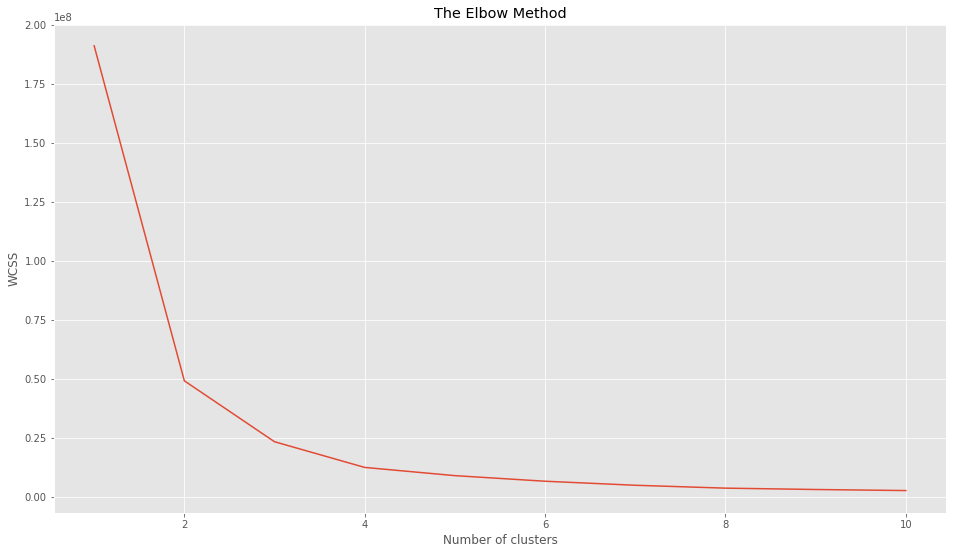

In [58]:
# Using the elbow method to find  the optimal number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0]
[[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


C:\Users\rkalh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


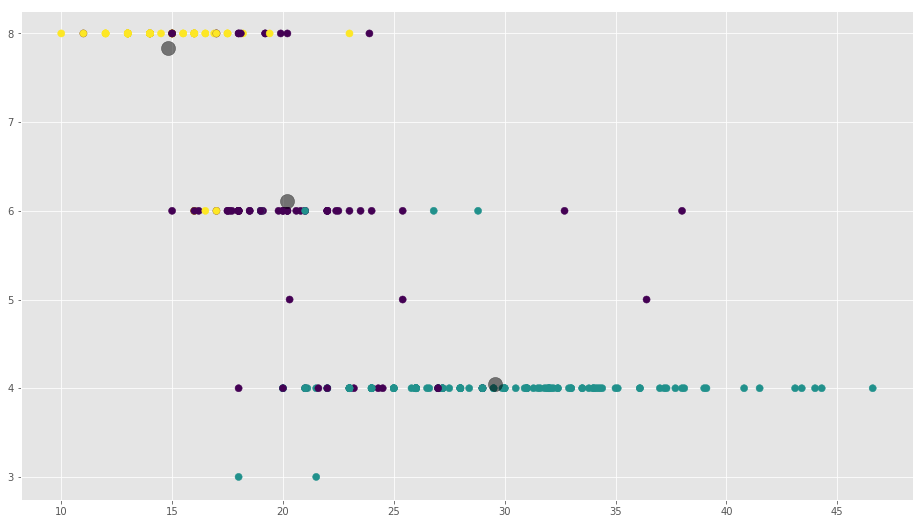

In [65]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(dataset)
print(y_kmeans)
datasetX = dataset.as_matrix(columns=None)
print(datasetX)
# Visualising the clusters
plt.scatter(datasetX[:, 0], datasetX[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);